In [17]:
import numpy as np
ID_labels = {}

direccion_ceph = 'CEPH_catalog_crossmatch_eros_ogle.csv'
etiquetas_ceph = np.genfromtxt(direccion_ceph, 'string', delimiter=',')

direccion_RRL = 'RRL_catalog_crossmatch_eros_ogle.csv'
etiquetas_RRL = np.genfromtxt(direccion_RRL, 'string', delimiter=',')

direccion_EB = 'EB_catalog_crossmatch_eros_ogle.csv'
etiquetas_EB = np.genfromtxt(direccion_EB, 'string', delimiter=',')

ogle_id_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 1]
labels_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 4]

ogle_id_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 1]
labels_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 4]

ogle_id_EB = etiquetas_EB[1:len(etiquetas_EB), 1]
labels_EB = etiquetas_EB[1:len(etiquetas_EB), 4]


for indice in range(len(ogle_id_ceph)):
    ID_labels[ ogle_id_ceph[indice] ] = labels_ceph[indice]
    
for indice in range(len(ogle_id_RRL)):
    ID_labels[ ogle_id_RRL[indice] ] = labels_RRL[indice]

for indice in range(len(ogle_id_EB)):
    ID_labels[ ogle_id_EB[indice] ] = labels_EB[indice]

In [18]:
import pickle
nombre_archivo_load = "final_features.p"
caracteristicas = pickle.load( open( nombre_archivo_load , "rb" ) )

"""
red_features = pickle.load( open( 'newfeatures1.p' , "rb" ) )
azul_features = pickle.load( open('azulFeatures.p' , "rb" ))

azul_periodics = pickle.load( open('azul_periodics.p' , "rb" ))
red_periodics =  pickle.load( open('red_periodics.p' , "rb" ))


len_azulf = len(azul_features[0,:])

len_azulp = len(azul_periodics[0,:])

len_redp = len(red_periodics[0,:])

caracteristicas_fake = np.concatenate((red_features, azul_features[:,1:len_azulf]), axis=1)


carac_feik = np.concatenate((caracteristicas_fake, azul_periodics[:,1:len_azulp]), axis = 1)

caracteristicas = np.concatenate((carac_feik, red_periodics[:,1:len_redp]), axis = 1)
"""

"""
# NOMBRES DE CARACTERISTICAS DEL ARCHIVO newfeatures.1.p. A FUTURO SE PIENSA CONCATENAR CARACTERISTICAS EN UNA MATRIX MAYOR
features_names = ['Red_mean', 'Red_std', 'Red_MagRatio', 'Red_amplitude', 'Red_skew', 'Red_kurt', 'Red_quartile31', \
                  'Red_stetson', 'Red_eta', 'Red_cusum', 'Red_shapiro', 'Red_B1std', 'Red_slope_trend', 'B_R', 'period', \
                  'Blue_mean', 'Blue_std', 'Blue_MagRatio', 'Blue_amplitude', 'Blue_skew', 'Blue_kurt', 'Blue_quartile31', \
                  'Blue_stetson', 'Blue_eta', 'Blue_cusum', 'Blue_shapiro', 'Blue_B1std',\
                  'Blue_amplitude', 'Blue_r21', 'Blue_r31', 'Blue_f_phase', 'Blue_phi21', 'Blue_phi31' \
                  'Red_phase_eta', 'Red_slope_per10', 'Red_slope_per90', 'Red_phase_cusum', \
                  'Red_amplitude', 'Red_r21', 'Red_r31', 'Red_f_phase', 'Red_phi21', 'Red_phi31', 'cancer']
"""


features_names= ['Red_weighted_mean','Red_weighted_std','Red_MagRatio','Red_amplitude',\
                  'Red_skew','Red_kurt', 'Red_quartile31', 'Red_stetson', 'Red_eta', 'Red_cusum',\
                  'Red_shapiro', 'Red_B1std', 'Red_hl_amp_ratio', \
                  'Red_phase_eta', 'Red_slope_per10', 'Red_slope_per90','Red_phase_cusum', \
                  'Red_amplitude_f', 'Red_r21', 'Red_r31', 'Red_f_phase', 'Red_phi21', 'Red_phi31', \
                  'Blue_weighted_mean', 'Blue_weighted_std', 'Blue_MagRatio', 'Blue_amplitude',\
                  'Blue_skew','Blue_kurt', 'Blue_quartile31', 'Blue_stetson', 'Blue_eta', 'Blue_cusum',\
                  'Blue_shapiro', 'Blue_B1std','Blue_hl_amp_ratio',\
                  'Blue_phase_eta', 'Blue_slope_per10', 'Blue_slope_per90','Blue_phase_cusum', \
                  'Blue_amplitude_f', 'Blue_r21', 'Blue_r31', 'Blue_f_phase', 'Blue_phi21', 'Blue_phi31', \
                  'B_R', 'period']
    

### Codigo para extraer extraer las subclases de cada una de las tres grandes clases ### 
########################################################################################
subclass = []
for ide in ID_labels:
    label_verify = ID_labels[ide]
    if not (label_verify in subclass):
        subclass.append(label_verify)

RRL_subclases = []
Cefeids_subclases = []
EB_subclases = []

for element in subclass:
    if element[0] == "R":
        RRL_subclases.append(element)   
    elif element[0] == "E":
        EB_subclases.append(element)
    else:
        Cefeids_subclases.append(element) 
           
#####  Rearmar las clases de manera que cada una se codifica con un número 0,1 o 2 ##### 
########################################################################################
        
def three_classes(labels_list):
    RRL = 0
    CEFEIDS = 1
    ECLIPSANTES = 2
    
    new_labels = []
    for etiqueta in labels_list:
        if etiqueta in RRL_subclases:
            new_labels.append(RRL)
        elif etiqueta in Cefeids_subclases:
            new_labels.append(CEFEIDS)
        else:
            new_labels.append(ECLIPSANTES)
    return new_labels


#####      Armar lista de clases a considerar en la clasificación de todas juntas  ##### 
########################################################################################

legit_clases = []
for subclase in RRL_subclases:
    legit_clases.append(subclase)
for subclase in Cefeids_subclases:
    if not (subclase == '13' or subclase == '123' or subclase == 'F12'):
        legit_clases.append(subclase)
for subclase in EB_subclases:
    if not (subclase == 'ED_TEB' or subclase == 'ESD_DPV'):
        legit_clases.append(subclase)
          

#####                     Traspasa los labels a codificación númerica              ##### 
########################################################################################

def all_clases(labels_list):
    
    new_labels = []
    errors = 0
    for etiqueta in labels_list:
        try:
            indice = legit_clases.index(etiqueta)
            new_labels.append(indice)
        except (ValueError):
            errors = errors + 1
            if etiqueta == 'ESD_DPV' or etiqueta == 'ED_TEB':
                index = legit_clases.index('ESD')
            elif etiqueta == '13' or etiqueta == '123' or etiqueta == 'F12': 
                index = legit_clases.index('ED')
            else:
                print "VALUE NOT CONSIDERED"
            new_labels.append(indice)
    
    return new_labels
            
            
only_labels = caracteristicas[:,0]                #Del vector de características generado, extraer columna de labels
big_class_labels = three_classes(only_labels)     #Codificacion para tres grandes clases
all_class_labels = all_clases(only_labels)        #Codificacion para todas las clases juntas



print "Conjunto de todas las clases: "
print legit_clases

Conjunto de todas las clases: 
['RRab', 'RRc', 'RRd', 'RRe', '1', 'F', '12', 'F1', '2', 'ESD', 'ED', 'EC', 'ED_ESD', 'ELL_EC', 'ED_VAR']


In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def prediction(arreglo):
    n_clases = len(arreglo[0])
    pred = []
    for prediccion in arreglo:
        actual_max = 0
        indice_max = 0
        for i, dato in enumerate(prediccion):
            if dato >= actual_max:
                actual_max = dato
                indice_max = i
        pred.append(indice_max)
    return pred

N_features = len(caracteristicas[1,:])
X_all = caracteristicas[:,1:N_features]
Y_all = big_class_labels


'''
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 2], c=Y, linewidth=0, alpha=0.5, s=20)
plt.grid()
'''

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, train_size=0.25, random_state = True)

def random_forest(X_all, Y_all, n_arboles, numero):
    X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, train_size=numero, random_state = True)
    clf_all = RandomForestClassifier(n_estimators=n_arboles, max_depth=None, bootstrap = True, n_jobs=-1, class_weight='balanced_subsample')
    clf_all.fit(X_train_all, Y_train_all)
    Y_pred_all = clf_all.predict_proba(X_test_all)


    importances = clf_all.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf_all.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    y_test_all = Y_test_all
    pred_all = Y_pred_all
    pred_pscore_all = prediction(pred_all)

    #score = metrics.f1_score(y_test_all, pred_all, pos_label=list(set(y_test_all)), average = 'samples')
    # training score
    #score_train = metrics.f1_score(y_train, pred_train, pos_label=list(set(y_train)))

    scores_type="micro"

    accuracy = metrics.accuracy_score(y_test_all, pred_pscore_all)


    #labels_ = np.linspace(0,len(legit_clases),len(legit_clases)+1)

    precision = metrics.precision_score(y_test_all, pred_pscore_all, average=scores_type)

    recall = recall_score(y_test_all, pred_pscore_all, average=scores_type) 

    f1 = f1_score(y_test_all, pred_pscore_all, average=scores_type)
                                                                     
    return accuracy, precision, recall, f1
                                                                    
                                                                


In [38]:

def iterar():
    accuracys = []
    precisions = []
    recalls = []
    f1s = []

   
    for iteration in range(20):
        n_arboles = (iteration+1)*50
        train_size = 0.25
        accuracy, precision, recall, f1 = random_forest(X_all, Y_all, n_arboles, train_size)
        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        print "Ready, Iteration Number: ", iteration
    
    return accuracys
        
    

In [39]:
def iterar():
    accuracys = []
    precisions = []
    recalls = []
    f1s = []

   
    for iteration in range(20):
        n_arboles = (iteration+1)*50
        train_size = 0.25
        accuracy, precision, recall, f1 = random_forest(X_all, Y_all, n_arboles, train_size)
        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        print "Ready, Iteration Number: ", iteration
    
    return accuracys
        
    
    

In [40]:
resultados = []

for i in range(5):
    resultados.append(iterar())

    

Ready, Iteration Number:  0
Ready, Iteration Number:  1
Ready, Iteration Number:  2
Ready, Iteration Number:  3
Ready, Iteration Number:  4
Ready, Iteration Number:  5
Ready, Iteration Number:  6
Ready, Iteration Number:  7
Ready, Iteration Number:  8
Ready, Iteration Number:  9
Ready, Iteration Number:  10
Ready, Iteration Number:  11
Ready, Iteration Number:  12
Ready, Iteration Number:  13
Ready, Iteration Number:  14
Ready, Iteration Number:  15
Ready, Iteration Number:  16
Ready, Iteration Number:  17
Ready, Iteration Number:  18
Ready, Iteration Number:  19
Ready, Iteration Number:  0
Ready, Iteration Number:  1
Ready, Iteration Number:  2
Ready, Iteration Number:  3
Ready, Iteration Number:  4
Ready, Iteration Number:  5
Ready, Iteration Number:  6
Ready, Iteration Number:  7
Ready, Iteration Number:  8
Ready, Iteration Number:  9
Ready, Iteration Number:  10
Ready, Iteration Number:  11
Ready, Iteration Number:  12
Ready, Iteration Number:  13
Ready, Iteration Number:  14
Ready

In [41]:
promedios = []
errores = []
N = len(resultados[0])

veces = len(resultados)

for j in range(N):
    subdatos = []
    for i in range(veces):
        subdatos.append(resultados[i][j])
    promedios.append(np.mean(subdatos))
    errores.append(np.std(subdatos))
    


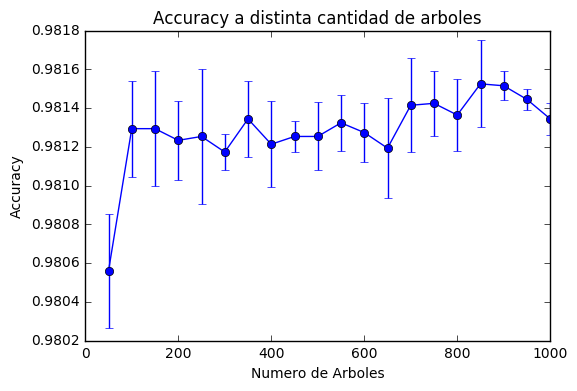

In [42]:
a = np.linspace(50,50*20, 20)
plt.figure()
plt.errorbar(a, promedios, yerr =errores, marker='o')
plt.title("Accuracy a distinta cantidad de arboles")
plt.ylabel("Accuracy")
plt.xlabel("Numero de Arboles")